## __Homework_4__

# Проводится исследование, раскрывающее характер и особенности задержек авиарейсов в аэропортах Нью-Йорка за 2013г

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'

flights = pd.read_csv(url1)

In [4]:
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'

weather = pd.read_csv(url2)

In [27]:
flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [28]:
weather.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


Все факторы, в связи с которыми возникают задержки авиарейсов в аэропортах Нью-Йорка, можно условно поделить на те, которые связаны с конкретным аэропортом (расположение аэропорта, рабочий персонал и т.д.), и те, которые влияют на все аэропорты в городе (из наших данных - это погодные условия и, возможно, авиаперевозчики). Поэтому целесообразно при поиске характерных зависимостей от погоды опираться на данные 3х аэропортов одновременно, а при поиске других факторов изучать данные каждого аэропорта в отдельности.

In [29]:
jfk = flights[flights['origin'] == 'JFK']
lga = flights[flights['origin'] == 'LGA']
ewr = flights[flights['origin'] == 'EWR']

In [30]:
flights_clear = flights.dropna()

Посмотрим на средние значения задержек в разные месяцы в году.

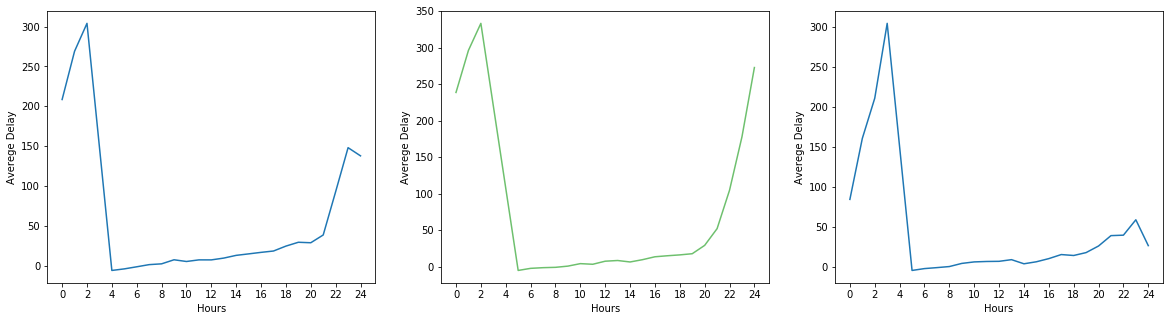

In [31]:
_, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.setp(ax, xticks=np.arange(0, 25, 2), xlabel='Hours',ylabel='Averege Delay')
 
ax[0].plot(np.sort(ewr['hour'][ewr['hour'].notna()].unique()), ewr.groupby(['hour'])['dep_delay'].mean())
ax[1].plot(np.sort(lga['hour'][lga['hour'].notna()].unique()), lga.groupby(['hour'])['dep_delay'].mean(), color = '#6EC06E')
ax[2].plot(np.sort(jfk['hour'][jfk['hour'].notna()].unique()), jfk.groupby(['hour'])['dep_delay'].mean())
plt.show()

Видно, что в интервале 2 a.m. - 4 a.m. задержки в аэропортах являются самыми большими. Причем далее идет очень резкое падение среднего значения задержек, и постепенно к вечеру средние значения задержек снова увеличиваются. 

Теперь давайте рассмотрим средние значения задержек в зависимости от месяца в году.

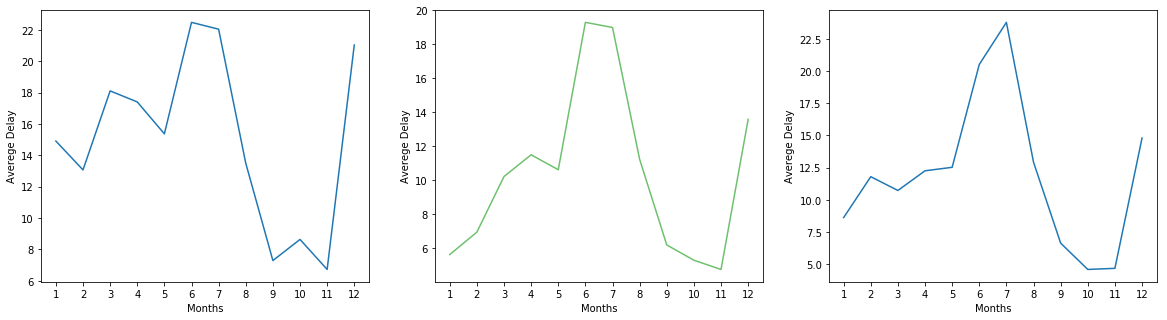

In [37]:
_, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.setp(ax, xticks=np.arange(1,13), xlabel='Months',ylabel='Averege Delay')
 
ax[0].plot(np.sort(ewr['month'][ewr['month'].notna()].unique()), ewr.groupby(['month'])['dep_delay'].mean())
ax[1].plot(np.sort(lga['month'][lga['month'].notna()].unique()), lga.groupby(['month'])['dep_delay'].mean(), color = '#6EC06E')
ax[2].plot(np.sort(jfk['month'][jfk['month'].notna()].unique()), jfk.groupby(['month'])['dep_delay'].mean())
plt.show()

Мы видим, что наибольшие пики приходятся на середину лета и на предновогодний период. В это время возможно стоит больше внимания уделить этой проблеме, тк она наиболее актуальна.

При этом, можно заметить, что данная проблема не связана с загруженностью аэропортов, тк среднее число перелетов в течение года меняется не сильно (за исключением нескольких месяцев), а значит аэропорты рассчитаны на такую нагрузку.

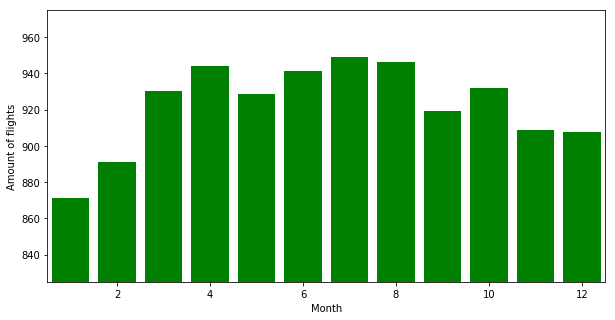

In [16]:
data_by_month = pd.DataFrame({'month': range(1, 13),
                              'amount_of_flights': [flights.groupby([flights.month, flights.day]).size()[i].mean()
                                                    for i in range(1, 13)] })

plt.figure(figsize=(10, 5))
plt.bar(data_by_month.month, data_by_month.amount_of_flights, color = 'g')
plt.xlim(0.5, 12.5)
plt.ylim(825, 975)
plt.ylabel('Amount of flights')
plt.xlabel('Month')

plt.show()


In [17]:
full = pd.merge(weather.drop('origin', 1),flights, on = ['year', 'month', 'day', 'hour'])
ewr_full = full[full['origin'] == 'EWR']
lga_full = full[full['origin'] == 'LGA']
jfk_full = full[full['origin'] == 'JFK']

In [18]:
ewr_full.head(15)

,Unnamed: 0_x,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,...,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,minute
2,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,844.0,-6.0,B6,N644JB,343,EWR,PBI,147.0,1023,1.0
5,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,858.0,-12.0,AA,N633AA,1895,EWR,MIA,152.0,1085,6.0
7,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,858.0,-17.0,UA,N53442,1077,EWR,MIA,157.0,1085,7.0
8,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,807.0,32.0,MQ,N9EAMQ,3768,EWR,ORD,139.0,719,8.0
12,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,833.0,-9.0,DL,N326NB,575,EWR,ATL,120.0,746,15.0
13,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,1017.0,3.0,US,N807AW,245,EWR,PHX,342.0,2133,22.0
16,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,909.0,29.0,EV,N11107,4626,EWR,MSP,190.0,1008,24.0
20,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,1016.0,29.0,UA,N33289,1665,EWR,LAX,366.0,2454,28.0
23,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,824.0,-9.0,US,N426US,1019,EWR,CLT,91.0,529,29.0
24,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,740.0,12.0,EV,N13553,4144,EWR,IAD,52.0,212,32.0


Посмотрим, есть ли зависимость времени задержки от дальности полетов

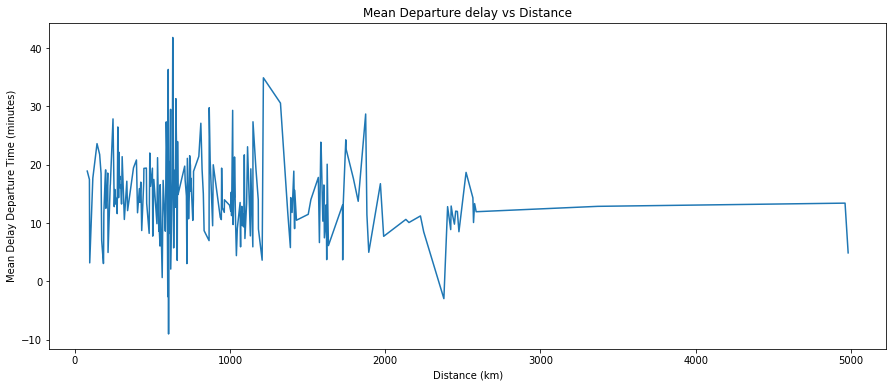

In [24]:
grouped_data_distance = pd.DataFrame(flights.groupby([flights.distance])['dep_delay'].mean().reset_index(name='Mean_Delay'))

plt.figure(figsize=(15, 6))
plt.plot(grouped_data_distance.distance, grouped_data_distance.Mean_Delay)
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Distance (km)')
plt.title('Mean Departure delay vs Distance')
plt.show()

Явной зависимости не наблюдается, поэтому можно сделать вывод, что среднее время задержки не связано напрямую с факторами, зависящими от дальности перелета (например с более длительной подготовкой самолета) 

Теперь рассмотрим число среднее число задержанных вылетов и среднее время задержки от направления ветра

In [25]:
flights_delayed = flights[(flights.dep_delay>0)] 

grouped_time = flights_delayed.groupby([flights_delayed.month,
                                           flights_delayed.day,
                                           flights_delayed.hour])['dep_delay'].agg([np.size, np.mean]).reset_index()

weather_flights_merged = pd.merge(grouped_time, weather, 
                                     on=['month', 'day', 'hour']).rename(columns={'size': 'Amount', 'mean': 'MeanDelay'})

weather_flights_merged.head()

,month,day,hour,Amount,MeanDelay,Unnamed: 0,origin,year,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,1,6.0,9.0,7.777778,6,EWR,2013,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,1,1,7.0,10.0,13.100000,7,EWR,2013,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
2,1,1,8.0,15.0,72.400000,8,EWR,2013,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
3,1,1,9.0,19.0,23.210526,9,EWR,2013,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
4,1,1,10.0,15.0,7.133333,10,EWR,2013,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


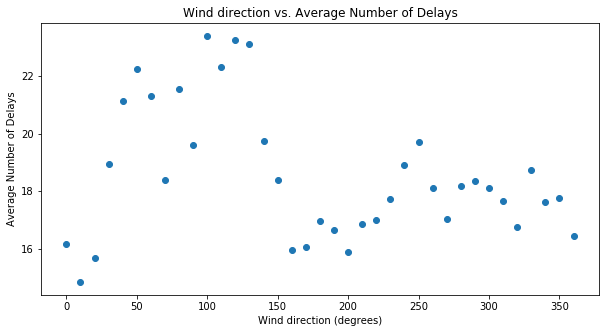

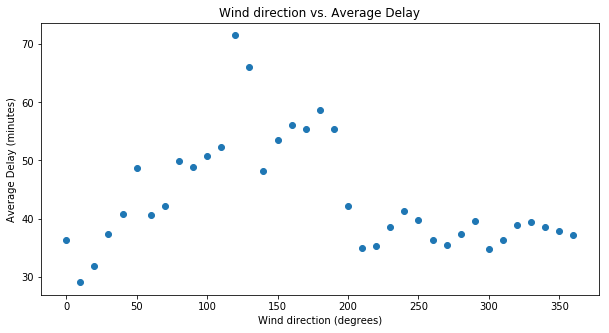

In [43]:
by_wind_dir = weather_flights_merged.groupby([weather_flights_merged.wind_dir])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()
#print(by_wind_dir.loc[:, ['wind_dir', 'Amount']])

plt.figure(figsize=(10, 5))
plt.scatter(by_wind_dir.wind_dir, by_wind_dir.Amount)
plt.ylabel('Average Number of Delays')
plt.xlabel('Wind direction (degrees)')
plt.title('Wind direction vs. Average Number of Delays')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(by_wind_dir.wind_dir, by_wind_dir.MeanDelay)
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Wind direction (degrees)')
plt.title('Wind direction vs. Average Delay')
plt.show()

Видно, что при направлении ветра 0 - 200 градусов число задержанных вылетов и среднее время задержки значительно выше 

Рассмотрим теперь зависимость среднего времени и числа задержек от дальности видимости:

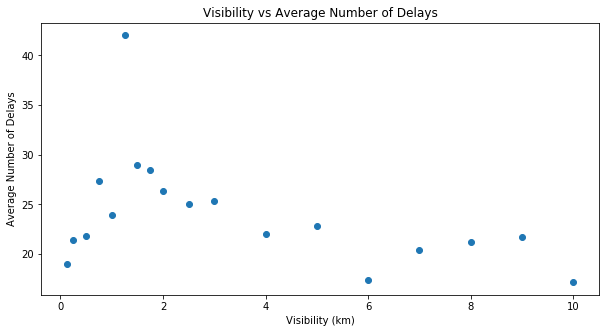

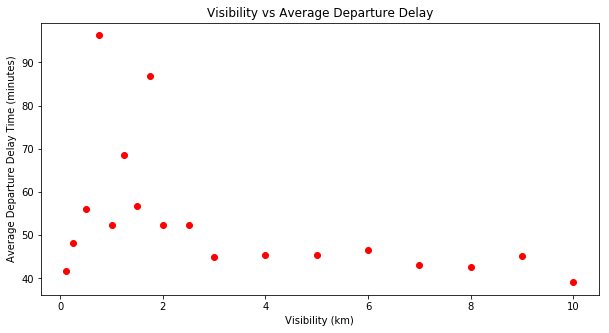

In [44]:
by_visib = weather_flights_merged.groupby([weather_flights_merged.visib])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(by_visib.visib, by_visib.Amount)
plt.ylabel('Average Number of Delays')
plt.xlabel('Visibility (km)')
plt.title('Visibility vs Average Number of Delays')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(by_visib.visib, by_visib.MeanDelay, color = 'r')
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Visibility (km)')
plt.title('Visibility vs Average Departure Delay')
plt.show()

Из графиков видно (и это довольно ожидаемо), что при дальности видимости ниже определенного значения (~3км) и среднее время, и число задержанных рейсов возрастает. При этом при дальности видимости большей этого значения оба показателя остаются примерно на постоянном уровне. Это говорит о том, что задержки перестают зависеть от видимости, и причина имеет иной характер.

Давайте рассмотрим зависимость среднего времени и числа задержек от уровня осадков 

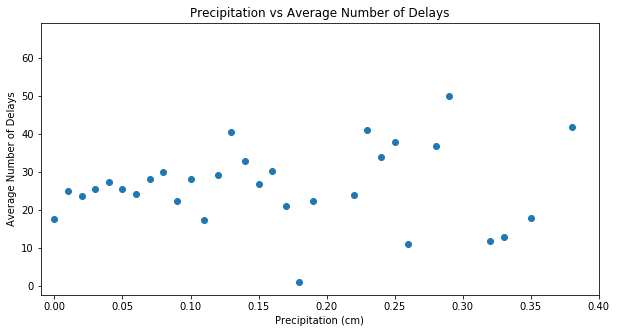

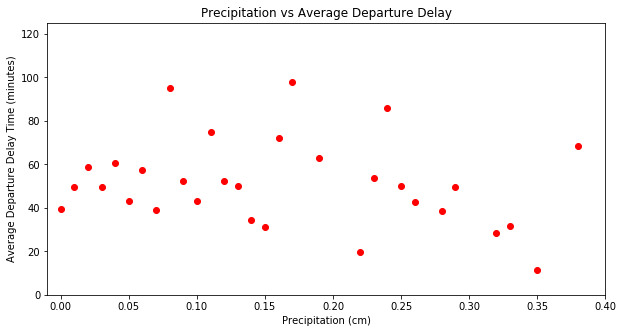

In [47]:
by_precip = weather_flights_merged.groupby([weather_flights_merged.precip])['Amount', 'MeanDelay'].agg([np.mean]).reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(by_precip.precip, by_precip.Amount)
plt.xlim(-0.01, 0.4)
plt.ylabel('Average Number of Delays')
plt.xlabel('Precipitation (cm)')
plt.title('Precipitation vs Average Number of Delays')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(by_precip.precip, by_precip.MeanDelay, color = 'r')
plt.xlim(-0.01, 0.4)
plt.ylim(0, 125)
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Precipitation (cm)')
plt.title('Precipitation vs Average Departure Delay')
plt.show()

На графиках видно, что никакой явной зависимости между уровнем осадков и задержками нет. Это довольно ожидаемо, поскольку осадки практически не оказывают никакого влияния на действия персонала и работников аэропорта. 